                           lat        lng  \
timeStamp                                   
2015-12-10 17:10:52  40.297876 -75.581294   

                                                                  desc  \
timeStamp                                                                
2015-12-10 17:10:52  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   

                         zip                   title          twp  \
timeStamp                                                           
2015-12-10 17:10:52  19525.0  EMS: BACK PAINS/INJURY  NEW HANOVER   

                                       addr  e cate  
timeStamp                                            
2015-12-10 17:10:52  REINDEER CT & DEAD END  1  EMS  
DatetimeIndex(['2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31',
               '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31',
               '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30',
               '2016-12-31', '2017-01-31', '2017-02-28', '

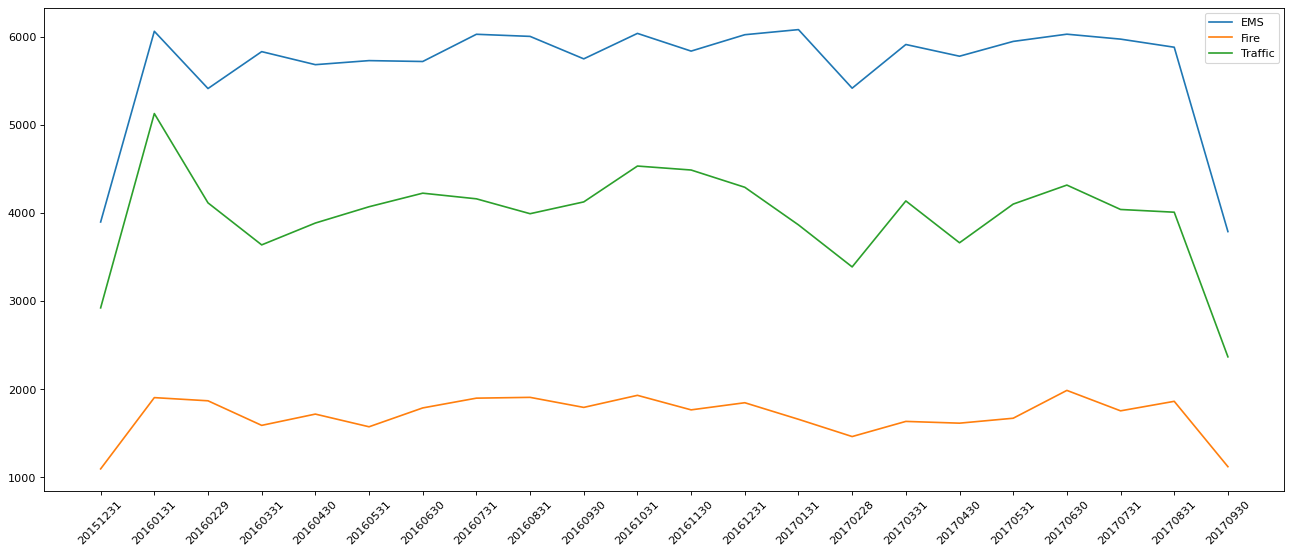

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#把时间字符串转为时间类型设置为索引
df = pd.read_csv("D:/study/ml/数据分析资料/数据分析资料/day06/code/911.csv")
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

#添加列，表示分类
temp_list = df["title"].str.split(": ").tolist()
cate_list = [i[0] for i in temp_list]
# print(np.array(cate_list).reshape((df.shape[0],1)))
df["cate"] = pd.DataFrame(np.array(cate_list).reshape((df.shape[0],1)))

df.set_index("timeStamp",inplace=True)

print(df.head(1))

plt.figure(figsize=(20, 8), dpi=80)

#分组
for group_name,group_data in df.groupby(by="cate"):

    #对不同的分类都进行绘图
    count_by_month = group_data.resample("M").count()["title"]

    # 画图
    _x = count_by_month.index
    print(_x)
    _y = count_by_month.values

    _x = [i.strftime("%Y%m%d") for i in _x]

    plt.plot(range(len(_x)), _y, label=group_name)


plt.xticks(range(len(_x)), _x, rotation=45)
plt.legend(loc="best")
plt.show()